## Linear regresion using normal equation and gradient descent

In [1]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
# to make this notebook's output stable across runs
import numpy as np
np.random.seed(42)

## the ideal  model is y=4+3x

In [3]:
X=2*np.random.rand(100,1)
y=4 + 3*X + np.random.randn(100,1)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [4]:
X.ndim

2

In [5]:
y.ndim

2

In [6]:
type(X)

numpy.ndarray

In [7]:
type(y)

numpy.ndarray

### X , y : column vector

In [8]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [9]:
y[:5]

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995]])

In [10]:
data=np.hstack((X,y))

In [11]:
print(type(data))

<class 'numpy.ndarray'>


In [12]:
data.ndim

2

In [13]:
print(data[:5])

[[0.74908024 6.33428778]
 [1.90142861 9.40527849]
 [1.46398788 8.48372443]
 [1.19731697 5.60438199]
 [0.31203728 4.71643995]]


## Let's see the input versus output

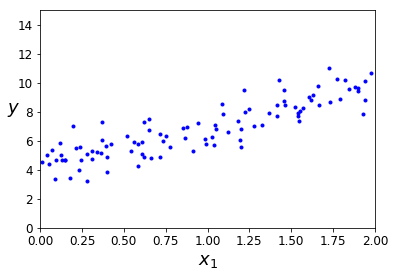

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### using stochastic gradient 

In [15]:
print(data[:5])

[[0.74908024 6.33428778]
 [1.90142861 9.40527849]
 [1.46398788 8.48372443]
 [1.19731697 5.60438199]
 [0.31203728 4.71643995]]


In [16]:
n_samples=np.size(data,0)
print(n_samples)

100


In [17]:
np.size(data,1)

2

###  Step 1: create placeholders for X (birth rate) and Y (life expectancy)

In [18]:
import tensorflow as tf
Xi = tf.placeholder(tf.float32, name='X')
Yo = tf.placeholder(tf.float32, name='Y')

### Step 2: create weight and bias, initialized to 0

In [19]:
w = tf.get_variable('weights', initializer=tf.constant(0.0))
b = tf.get_variable('bias', initializer=tf.constant(0.0))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
Y_predicted = w * Xi + b 

In [21]:
loss = tf.square(Yo - Y_predicted, name='loss')

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [59]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) 
    #  train the model for 20 epochs
    for i in range(50):
        total_loss = 0
        count=0
        for xq,yq in data:
            #print(xq,yq)
            _, l = sess.run([optimizer, loss], feed_dict={Xi: xq, Yo:yq})
            total_loss += l
            count=count+1
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))
        print("count=",count)
        print(w_out, b_out)
        print(" ")
    w_out, b_out = sess.run([w, b]) 

Epoch 0: 34.50696586608887
count= 100
2.9401784 4.039182
 
Epoch 1: 15.628871957063675
count= 100
2.9401784 4.039182
 
Epoch 2: 7.3890039037168025
count= 100
2.9401784 4.039182
 
Epoch 3: 3.790927385073155
count= 100
2.9401784 4.039182
 
Epoch 4: 2.217449272735976
count= 100
2.9401784 4.039182
 
Epoch 5: 1.5266186907861448
count= 100
2.9401784 4.039182
 
Epoch 6: 1.2203909572157636
count= 100
2.9401784 4.039182
 
Epoch 7: 1.0816883671889082
count= 100
2.9401784 4.039182
 
Epoch 8: 1.0159924734657397
count= 100
2.9401784 4.039182
 
Epoch 9: 0.98219562241924
count= 100
2.9401784 4.039182
 
Epoch 10: 0.9624540629527201
count= 100
2.9401784 4.039182
 
Epoch 11: 0.9490388032395276
count= 100
2.9401784 4.039182
 
Epoch 12: 0.9386087599269376
count= 100
2.9401784 4.039182
 
Epoch 13: 0.9297212580893028
count= 100
2.9401784 4.039182
 
Epoch 14: 0.9217518754351477
count= 100
2.9401784 4.039182
 
Epoch 15: 0.9144255511620577
count= 100
2.9401784 4.039182
 
Epoch 16: 0.9076146485067147
count= 100

In [32]:
print(w_out, b_out)

2.9401784 4.039182


## sklearn.linear_model.SGDRegressor
### Linear model fitted by minimizing a regularized empirical loss with SGD
### The loss function to be used. The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’

In [35]:
data[:5]

array([[0.74908024, 6.33428778],
       [1.90142861, 9.40527849],
       [1.46398788, 8.48372443],
       [1.19731697, 5.60438199],
       [0.31203728, 4.71643995]])

In [36]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [38]:
y.ravel()[:5]

array([6.33428778, 9.40527849, 8.48372443, 5.60438199, 4.71643995])

In [72]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change=51,learning_rate='constant',penalty=None, eta0=0.001, random_state=None, shuffle=False)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=51, penalty=None, power_t=0.25, random_state=None,
             shuffle=False, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [73]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.03294199]), array([2.93831877]))